# Predicting chronic kidney disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has a chronic kidney disease based on their medical attributes.

## Problem Defenition
In a statement,
> Given clinical parameters about patients, can we predict whether or not they have a chronic kidney disease? This is a binary classification problem.

## Data
This dataset is originally from UCI Machine Learning Repository. However, this is a cleaned dataset from Kaggle.
https://www.kaggle.com/abhia1999/chronic-kidney-disease

## Preparing the tools

In [2]:
#Importing EDA (Exploratory Data Analysis) and other Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import Sklearn Models
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

## Load the Data

In [3]:
df=pd.read_csv("chronic-kidney-disease.csv")
df.head(10)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
5,90.0,1.015,3.0,0.0,1.0,25.0,1.1,142.00,3.20,12.2,7800.0,4.40,1.0,1
6,70.0,1.010,0.0,0.0,1.0,54.0,24.0,104.00,4.00,12.4,8406.0,4.71,0.0,1
7,76.0,1.015,2.0,4.0,1.0,31.0,1.1,137.53,4.63,12.4,6900.0,5.00,0.0,1
8,100.0,1.015,3.0,0.0,1.0,60.0,1.9,137.53,4.63,10.8,9600.0,4.00,1.0,1
9,90.0,1.020,2.0,0.0,0.0,107.0,7.2,114.00,3.70,9.5,12100.0,3.70,1.0,1


In [4]:
df.tail(10)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
390,80.0,1.025,0.0,0.0,1.0,25.0,0.8,135.0,3.7,15.0,6300.0,5.3,0.0,0
391,80.0,1.025,0.0,0.0,1.0,16.0,1.1,142.0,4.1,15.6,5800.0,6.3,0.0,0
392,80.0,1.020,0.0,0.0,1.0,48.0,1.2,147.0,4.3,14.8,6600.0,5.5,0.0,0
393,60.0,1.025,0.0,0.0,1.0,45.0,0.7,141.0,4.4,13.0,7400.0,5.4,0.0,0
394,80.0,1.020,0.0,0.0,1.0,46.0,0.8,139.0,5.0,14.1,9500.0,4.6,0.0,0
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.0,4.9,15.7,6700.0,4.9,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.0,3.5,16.5,7800.0,6.2,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.0,4.4,15.8,6600.0,5.4,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.0,4.9,14.2,7200.0,5.9,0.0,0
399,80.0,1.025,0.0,0.0,1.0,18.0,1.1,141.0,3.5,15.8,6800.0,6.1,0.0,0


***Checking for missing data***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
Bp       400 non-null float64
Sg       400 non-null float64
Al       400 non-null float64
Su       400 non-null float64
Rbc      400 non-null float64
Bu       400 non-null float64
Sc       400 non-null float64
Sod      400 non-null float64
Pot      400 non-null float64
Hemo     400 non-null float64
Wbcc     400 non-null float64
Rbcc     400 non-null float64
Htn      400 non-null float64
Class    400 non-null int64
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


## Shuffle the data
> *As we can see the Class=1 means the patient has a chronic kidney disease and the Class=0 means that the patient doesn't have chronic kidney disease. However, the dataset is not shuffled so we need to do that next. Note that we will also reset the index.*

In [7]:
np.random.seed(42)
df= df.sample(frac=1).reset_index(drop=True)

> *Another thing we need to look into is that if the sample data is balanced, meaning that it is not biased towards patients with chronic kidney disease or vice versa.*

In [8]:
CKD={}
CKD['Diseased Patients']= df["Class"].value_counts()[1]
CKD['Undiseased Patients']= df["Class"].value_counts()[0]
CKD

{'Diseased Patients': 250, 'Undiseased Patients': 150}

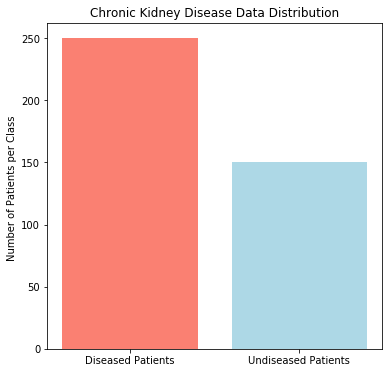

In [9]:
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(CKD.keys(),CKD.values(),color=['salmon','lightblue']) 
##Salmon for the diseased patients, lightblue for the undiseased patients.
ax.set(title="Chronic Kidney Disease Data Distribution",ylabel="Number of Patients per Class ");

> *As we can see the dataset is unbalanced, however we will proceed with building the machine learning model in order to see if the model will be biased by this i.e. we will observe if the model favors predicting patient's as being diseased.*

## Split the data
***We will start of by splitting the dataset into training and validation sets. We will do an 70%- 30% split.***

In [10]:
X_train, X_val = train_test_split(df, test_size=0.3, random_state=42)
X_train.shape, X_val.shape

((280, 14), (120, 14))

> Separate the features from the target variable

In [11]:
y_train = X_train.pop("Class")
y_val = X_val.pop("Class")
X_train.shape,y_train.shape, X_val.shape,y_val.shape

((280, 13), (280,), (120, 13), (120,))

## Modeling
> Now that the data is ready, we can start creating our model! Since this is a Classification problem, I will start by trying the Random Forest Classifier.

In [12]:
np.random.seed(42)
model = RandomForestClassifier(n_estimators=10)
model = model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_val, y_val))

1.0
0.95


### As you can see, we got a very high score using the Random Forest Classifier.
***And the reason for that is:***

* 1: We are using a Kaggle data set that is already cleaned and has the appropriate features that have a high correlation with the target "Class". As we can see from the correlation table below a lot of the features have a high correlation with the target "Class".
* 2: We used a Random Forest Classifier for our classification problem which is a powerful ensembled model.
* 3: In addition to the reasons above, we only have 400 records which means that our model was able to fit the data easily, thus the 1.0 score on the training set.

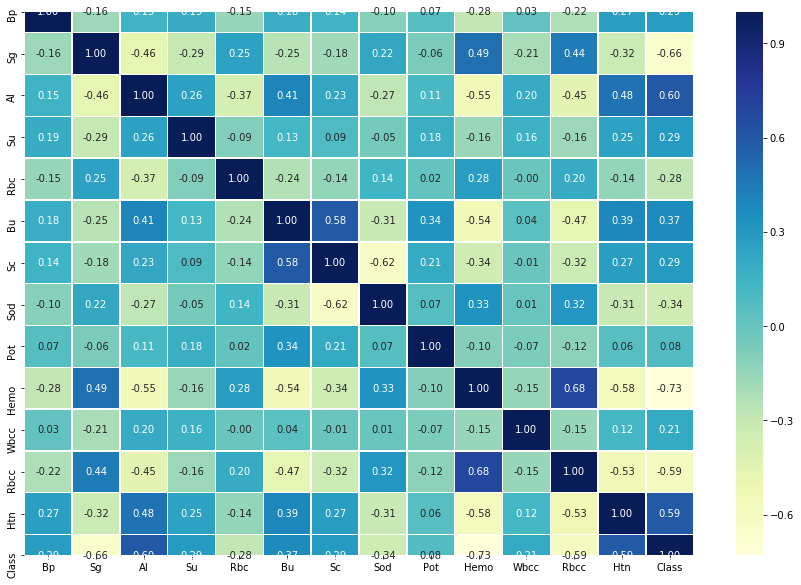

In [13]:
corr_matrix = df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Experimenting
> However, the model is clearly overfitting the data, and we need to have some generalization. We will use cross validation to see effects of this overfitting. I'm mainly interested in the Accuracy and F1 metrics.

In [15]:
X = pd.concat([X_train, X_val])
y = pd.concat([y_train, y_val])
X.shape, y.shape

((400, 13), (400,))

In [16]:
cv_acc = np.mean(cross_val_score(model,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="accuracy"))

cv_f1 = np.mean(cross_val_score(model,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="f1"))

print("Cross-val-accuracy-score:",cv_acc)
print("Cross-val-F1-score:",cv_f1)

Cross-val-accuracy-score: 0.985
Cross-val-F1-score: 0.9902143612419494


> ***We will change some of the hyperparameters in order to get a regularizing effect, such as the decreasing the max_leaf_nodes, and increasing the n_estimators.***

In [16]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
model2 = RandomForestClassifier(n_estimators=200, max_leaf_nodes=10)
model2 = model2.fit(X_train, y_train)

print(model2.score(X_train, y_train))
print(model2.score(X_val, y_val))

1.0
0.9583333333333334


In [19]:
X = pd.concat([X_train, X_val])
y = pd.concat([y_train, y_val])
X.shape, y.shape

((400, 13), (400,))

In [20]:
np.random.seed(42)
cv_acc = np.mean(cross_val_score(model2,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="accuracy"))

cv_f1 = np.mean(cross_val_score(model2,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="f1"))

print("Cross-val-accuracy-score:",cv_acc)
print("Cross-val-F1-score:",cv_f1)

Cross-val-accuracy-score: 0.9924999999999999
Cross-val-F1-score: 0.9920792079207921


### This model generalizes better as observed by the cross validation F1 and Accuracy scores. So, we will be using it.
***Now let's view an evaluation metrics: ***
* Classification Report


In [22]:
y_preds = model2.predict(X_val)
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        41
           1       0.95      0.99      0.97        79

    accuracy                           0.96       120
   macro avg       0.96      0.94      0.95       120
weighted avg       0.96      0.96      0.96       120



## Save the model
Finally, we will save this model in case we want to use it later.

In [23]:
from joblib import dump, load
dump(model2, 'chronic-kidney-disease-model.joblib')

['chronic-kidney-disease-model.joblib']

In [25]:
loaded_model = load('chronic-kidney-disease-model.joblib') 